<a href="https://colab.research.google.com/github/asadbek11211/Matplotlib_exampls/blob/main/matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

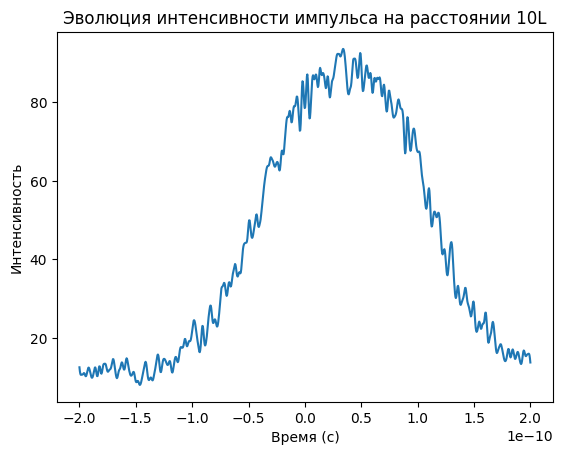

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Заданные параметры
P = 10  # Мощность
white = 100e-12  # Длительность белого импульса
dark = 1e-12  # Длительность темного импульса
t0 = 0  # Позиция
gamma = 0.0031  # Параметр gamma
beta2 = -1.8e-27  # Параметр beta^2
beta3 = 1.2e-40  # Параметр beta^3
LNL = 0.3 * 10 ** 2 / (gamma * P)  # Нелинейная длина

# Границы по времени
t_min = -200e-12
t_max = 200e-12

# Число точек на временной сетке
Nt = 2 ** 10

# Шаг по времени
dt = (t_max - t_min) / (Nt - 1)

# Формирование временной сетки
t = np.linspace(t_min, t_max, Nt)

# Фурье-образ начального импульса
A_tz0 = P * np.exp(-t ** 2 / (2 * white ** 2)) * (1 - 0.5 * np.exp(-t ** 2 / (2 * dark ** 2)))
A_w0 = np.fft.fftshift(np.fft.fft(A_tz0))

# Фурье-образ функции эволюции
k = np.fft.fftshift(2 * np.pi * np.linspace(-1 / (2 * dt), 1 / (2 * dt), Nt))
k2 = k ** 2
k3 = k ** 3
A_w = np.exp(-1j * gamma * P * LNL * k2 / 2) * A_w0

# Обратное преобразование Фурье
A_tz = np.fft.ifft(np.fft.ifftshift(A_w))

# Построение графика интенсивности |A(t, z)|^2
plt.plot(t, np.abs(A_tz) ** 2)
plt.xlabel('Время (с)')
plt.ylabel('Интенсивность')
plt.title('Эволюция интенсивности импульса на расстоянии 10L')
plt.show()

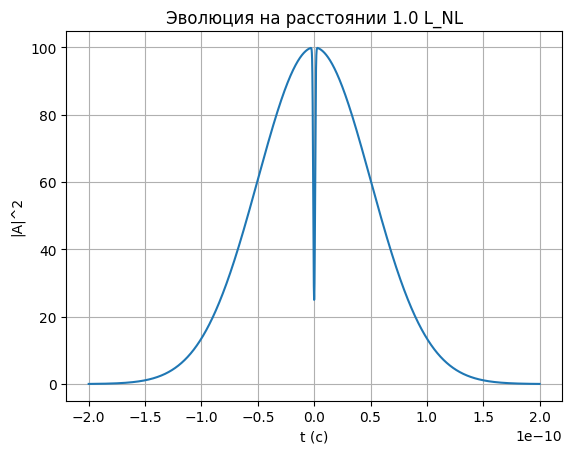

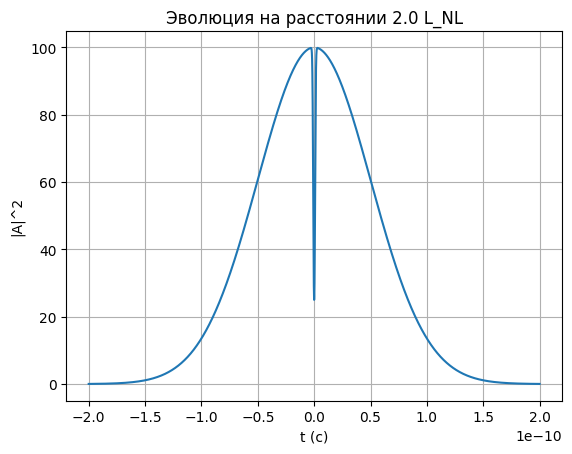

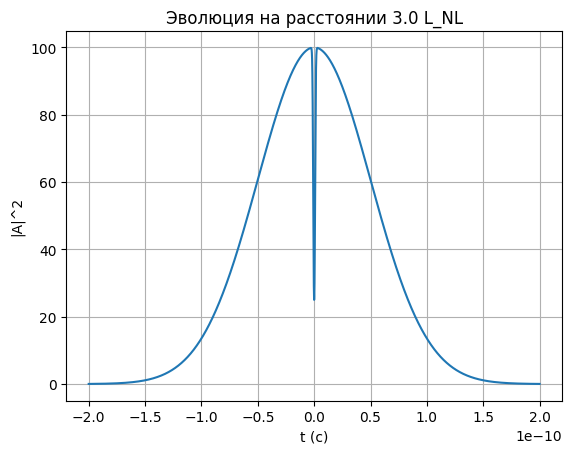

In [14]:
import numpy as np
from scipy.fft import fft, ifft
import matplotlib.pyplot as plt

# Заданные параметры
P = 10  # Вт
τ_white = 100e-12  # с
τ_dark = 1e-12  # с
t_0 = 0  # с
γ = 0.003  # 1 / (Вт * м)
β_2 = -1.8e-27  # с^2 / м^2
β_3 = 1.2e-40  # 1 / с^2
h_z = 1e3  # м
α = 1 - 10**(-0.2 * h_z / (20 * 1e3))

# Расчет параметров сетки
T = 400e-12  # с
dt = 1e-15  # с
N = int(T / dt)
t = np.linspace(-T/2, T/2, N)

# Определение начального условия
A_0 = P * np.exp(-(t - t_0)**2 / τ_white**2) * (1 - 0.5 * np.exp(-(t - t_0)**2 / τ_dark**2))

# Преобразование Фурье начального условия
A_0_hat = fft(A_0)

# Расчет эволюции на расстоянии L_NL
L_NL = 1 / (γ * P)
z_values = [1 * L_NL, 2 * L_NL, 3 * L_NL]

# Цикл по значениям z
for z in z_values:
    kz = 2 * np.pi / L_NL  # Волновое число
    kz2 = kz**2
    kz3 = kz**3

    # Расчет эволюции методом Фурье
    A_hat = A_0_hat * np.exp(-1j * (kz2 / 2) * β_2 * z) * np.exp(-1j * (kz3 / 6) * β_3 * z)
    A = ifft(A_hat)

    # Визуализация результата
    plt.figure()
    plt.plot(t, np.abs(A)**2)
    plt.xlabel('t (с)')
    plt.ylabel('|A|^2')
    plt.title('Эволюция на расстоянии {} L_NL'.format(z / L_NL))
    plt.grid(True)
    plt.show()


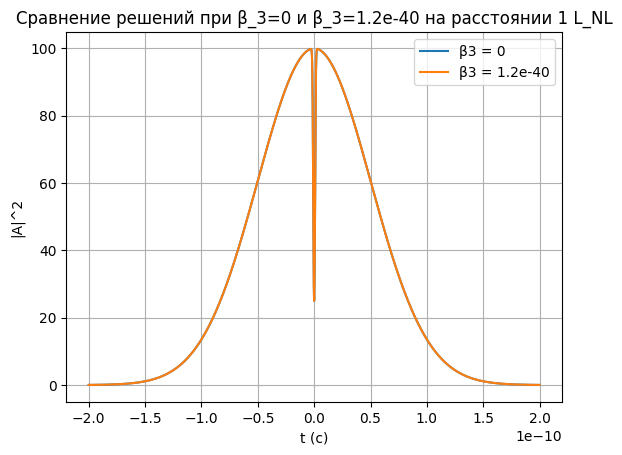

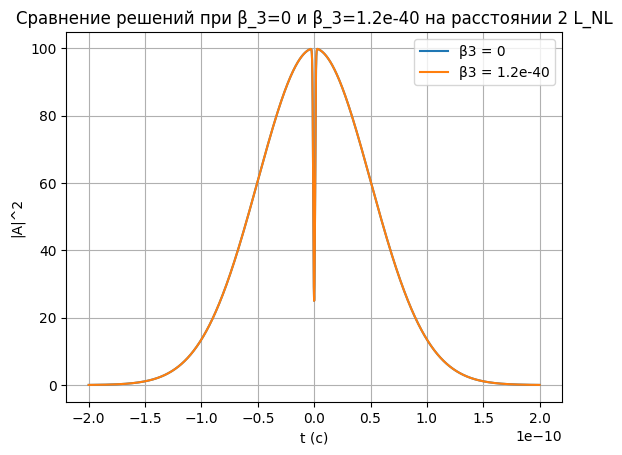

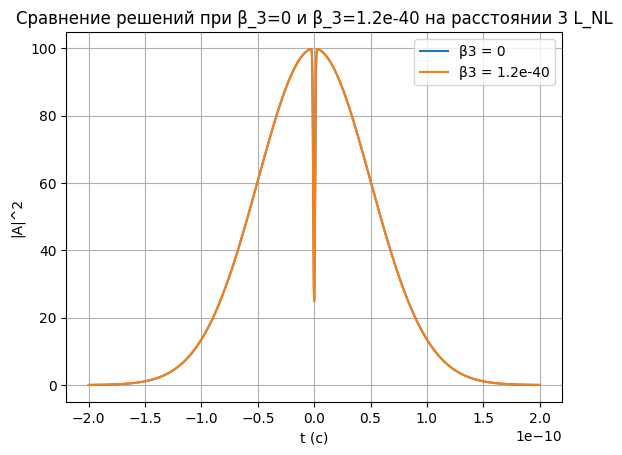

In [17]:
import numpy as np
from scipy.fft import fft, ifft
import matplotlib.pyplot as plt

# Заданные параметры
P = 10  # Вт
τ_white = 100e-12  # с
τ_dark = 1e-12  # с
t_0 = 0  # с
γ = 0.003  # 1 / (Вт * м)
β_2 = -1.8e-27  # с^2 / м^2
β_3_1 = 0  # для β_3 = 0
β_3_2 = 1.2e-40  # для β_3 = 1.2e-40
h_z = 1e3  # м
α = 1 - 10**(-0.2 * h_z / (20 * 1e3))

# Расчет параметров сетки
T = 400e-12  # с
dt = 1e-15  # с
N = int(T / dt)
t = np.linspace(-T/2, T/2, N)

# Определение начального условия
A_0 = P * np.exp(-(t - t_0)**2 / τ_white**2) * (1 - 0.5 * np.exp(-(t - t_0)**2 / τ_dark**2))

# Преобразование Фурье начального условия
A_0_hat = fft(A_0)

# Расчет эволюции на расстоянии L_NL
L_NL = 1 / (γ * P)
z_values = [1 * L_NL, 2 * L_NL, 3 * L_NL]

# Цикл по значениям z
for z in z_values:
    kz = 2 * np.pi / L_NL  # Волновое число
    kz2 = kz**2

    # Расчет эволюции методом Фурье для β_3 = 0
    A_hat_1 = A_0_hat * np.exp(-1j * (kz2 / 2) * β_2 * z)
    A_1 = ifft(A_hat_1)

    # Расчет эволюции методом Фурье для β_3 = 1.2e-40
    kz3 = kz**3
    A_hat_2 = A_0_hat * np.exp(-1j * (kz2 / 2) * β_2 * z) * np.exp(-1j * (kz3 / 6) * β_3_2 * z)
    A_2 = ifft(A_hat_2)

    # Визуализация результата
    plt.figure()
    plt.plot(t, np.abs(A_1)**2, label='β3 = 0')
    plt.plot(t, np.abs(A_2)**2, label='β3 = 1.2e-40')
    plt.xlabel('t (с)')
    plt.ylabel('|A|^2')
    plt.title('Сравнение решений при β_3=0 и β_3=1.2e-40 на расстоянии {} L')
    NL_label = '{} L_NL'.format(int(z / L_NL))
    plt.title('Сравнение решений при β_3=0 и β_3=1.2e-40 на расстоянии ' + NL_label)
    plt.legend()
    plt.grid(True)
    plt.show()

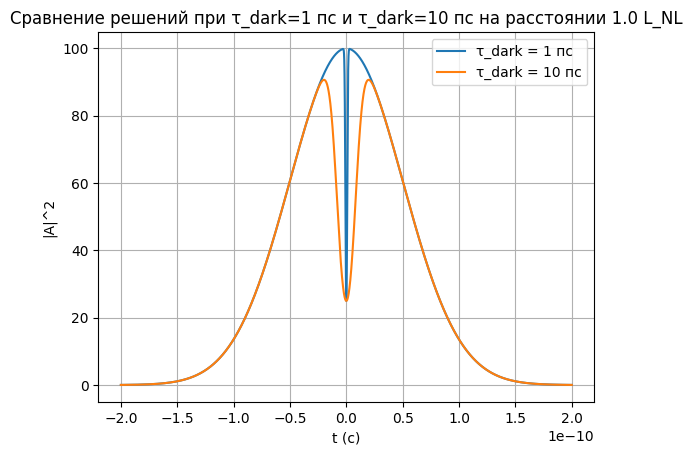

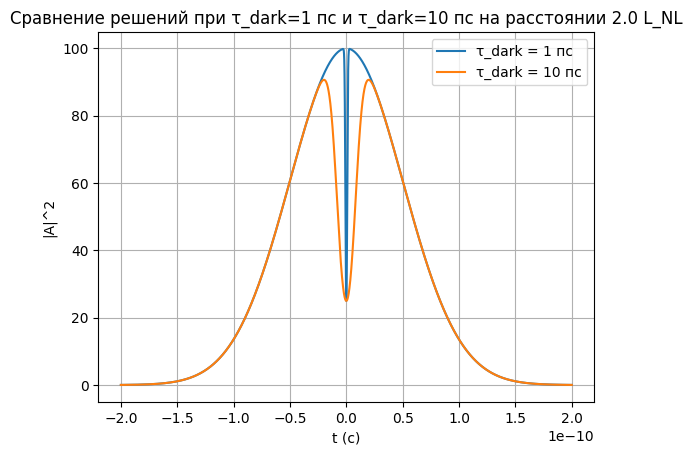

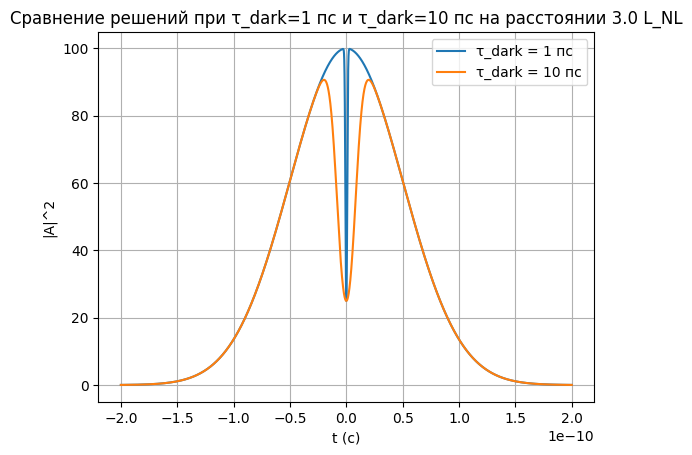

In [18]:
import numpy as np
from scipy.fft import fft, ifft
import matplotlib.pyplot as plt

# Заданные параметры
P = 10  # Вт
τ_white = 100e-12  # с
τ_dark_1 = 1e-12  # с для τ_dark = 1 пс
τ_dark_2 = 10e-12  # с для τ_dark = 10 пс
t_0 = 0  # с
γ = 0.003  # 1 / (Вт * м)
β_2 = -1.8e-27  # с^2 / м^2
β_3 = 1.2e-40
h_z = 1e3  # м
α = 1 - 10**(-0.2 * h_z / (20 * 1e3))

# Расчет параметров сетки
T = 400e-12  # с
dt = 1e-15  # с
N = int(T / dt)
t = np.linspace(-T/2, T/2, N)

# Определение начального условия
A_0_1 = P * np.exp(-(t - t_0)**2 / τ_white**2) * (1 - 0.5 * np.exp(-(t - t_0)**2 / τ_dark_1**2))
A_0_2 = P * np.exp(-(t - t_0)**2 / τ_white**2) * (1 - 0.5 * np.exp(-(t - t_0)**2 / τ_dark_2**2))

# Преобразование Фурье начального условия
A_0_hat_1 = fft(A_0_1)
A_0_hat_2 = fft(A_0_2)

# Расчет эволюции на расстоянии L_NL
L_NL = 1 / (γ * P)
z_values = [1 * L_NL, 2 * L_NL, 3 * L_NL]

# Цикл по значениям z
for z in z_values:
    kz = 2 * np.pi / L_NL  # Волновое число
    kz2 = kz**2

    # Расчет эволюции методом Фурье для τ_dark = 1 пс
    kz3 = kz**3
    A_hat_1 = A_0_hat_1 * np.exp(-1j * (kz2 / 2) * β_2 * z) * np.exp(-1j * (kz3 / 6) * β_3 * z)
    A_1 = ifft(A_hat_1)

    # Расчет эволюции методом Фурье для τ_dark = 10 пс
    A_hat_2 = A_0_hat_2 * np.exp(-1j * (kz2 / 2) * β_2 * z) * np.exp(-1j * (kz3 / 6) * β_3 * z)
    A_2 = ifft(A_hat_2)

    # Визуализация результата
    plt.figure()
    plt.plot(t, np.abs(A_1)**2, label='τ_dark = 1 пс')
    plt.plot(t, np.abs(A_2)**2, label='τ_dark = 10 пс')
    plt.xlabel('t (с)')
    plt.ylabel('|A|^2')
    plt.title('Сравнение решений при τ_dark=1 пс и τ_dark=10 пс на расстоянии {} L_NL'.format(z / L_NL))
    plt.legend()
    plt.grid(True)
    plt.show()